## DATA UNDERTANDING

### IMPORT LIBRARIES

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(style="whitegrid")

### LOAD DATA

In [99]:
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### DATA STRUCTURE OVERVIEW

In [100]:
print("TAIL = ")
display(df.tail())

print("\n DATA INFO = ")
print(df.info())

print("\n DATA SHAPE = ")
print(df.shape)

print("\n DATA COLUMNS = ")
print(df.columns)

TAIL = 


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1



 DATA INFO = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  

### DATA TYPES (NUMERIC-CATEGORICAL)

In [101]:
print("\n DATA TYPES = ")
print(df.dtypes)

num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\n NUMERIC COLUMNS = ", num_cols)
print("\n CATEGORICAL COLUMNS = ", cat_cols)


 DATA TYPES = 
id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

 NUMERIC COLUMNS =  ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study 

### MISSING VALUE ANALYSIS


TOTAL MISSING VALUES
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

PERCENT MISSING VALUES (%)
id                                       0.0
Gender                                   0.0
Age                                      0.0
City                        

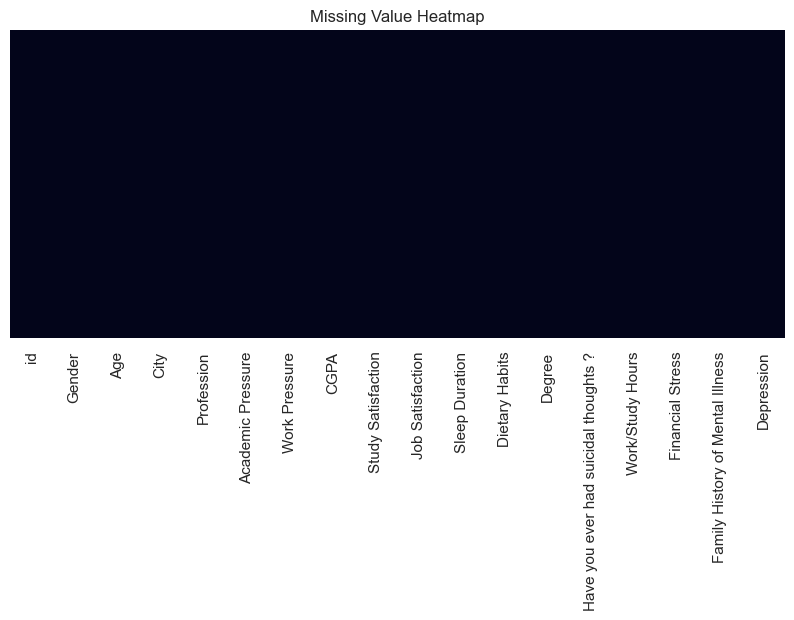

In [102]:
print("\nTOTAL MISSING VALUES")
print(df.isnull().sum())

print("\nPERCENT MISSING VALUES (%)")
print(df.isnull().mean() * 100)

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

###  DUPLICATE CHECK

In [103]:
print("DUPLICATED ROWS = ")
print(df.duplicated().sum())

DUPLICATED ROWS = 
0


### DESCRIPTIVE STATISTICS

In [104]:
print("\n NUMERICAL SUMMARY")
display(df.describe())

print("\n CATEGORICAL SUMMARY")
display(df.describe(include='object'))



 NUMERICAL SUMMARY


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000



 CATEGORICAL SUMMARY


,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,6,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,5.0,No
freq,15547,1570,27870,8310,10317,6080,17656,6715,14398


### UNIQUE VALUE

In [ ]:
print("\nUnique Values per Categorical Column:\n")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values per Categorical Column:

Gender: 2 unique values
City: 52 unique values
Profession: 14 unique values
Sleep Duration: 5 unique values
Dietary Habits: 4 unique values
Degree: 28 unique values
Have you ever had suicidal thoughts ?: 2 unique values
Financial Stress: 6 unique values
Family History of Mental Illness: 2 unique values


### DISTRIBUTION ANALYSIS

In [14]:
print("\nUnique Values per Numeric Column:\n")
for col in num_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values per Numeric Column:

id: 27901 unique values
Age: 34 unique values
Academic Pressure: 6 unique values
Work Pressure: 3 unique values
CGPA: 332 unique values
Study Satisfaction: 6 unique values
Job Satisfaction: 5 unique values
Work/Study Hours: 13 unique values
Depression: 2 unique values



 DISTRIBUTION PLOTS: NUMERICAL


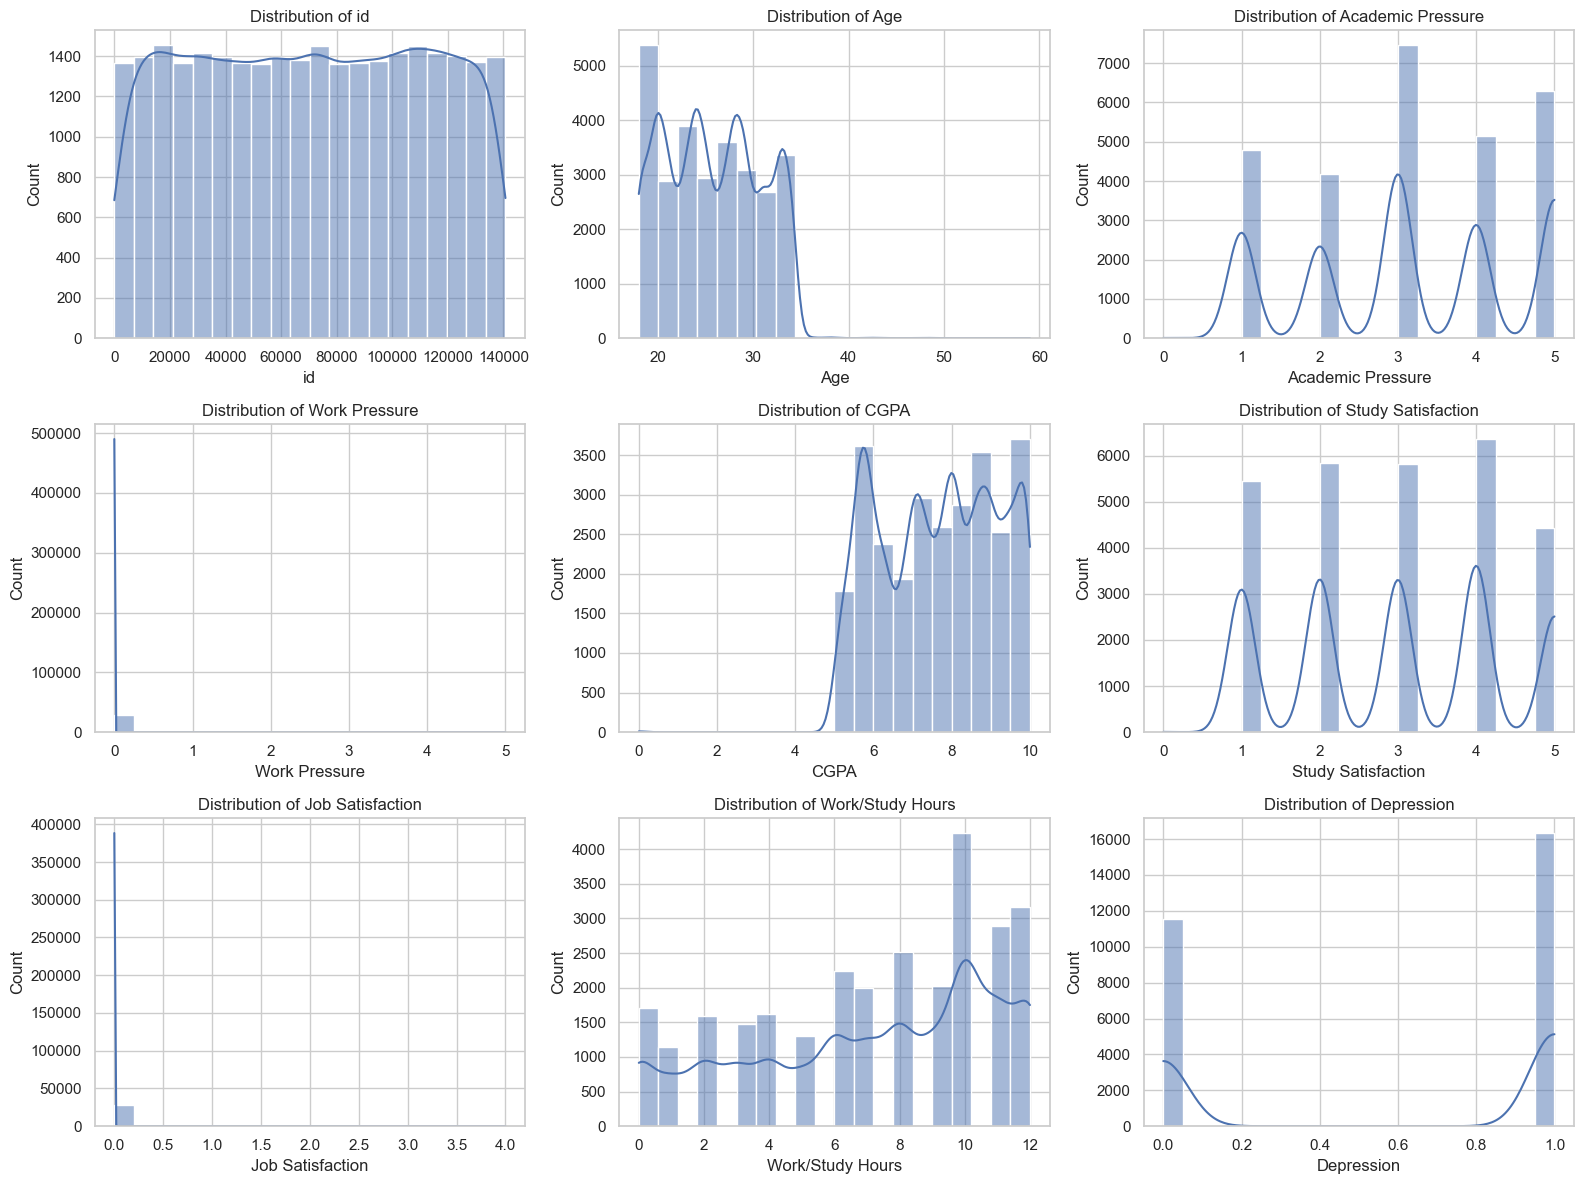

In [110]:
print("\n DISTRIBUTION PLOTS: NUMERICAL")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


 DISTRIBUTION PLOTS: CATEGORICAL


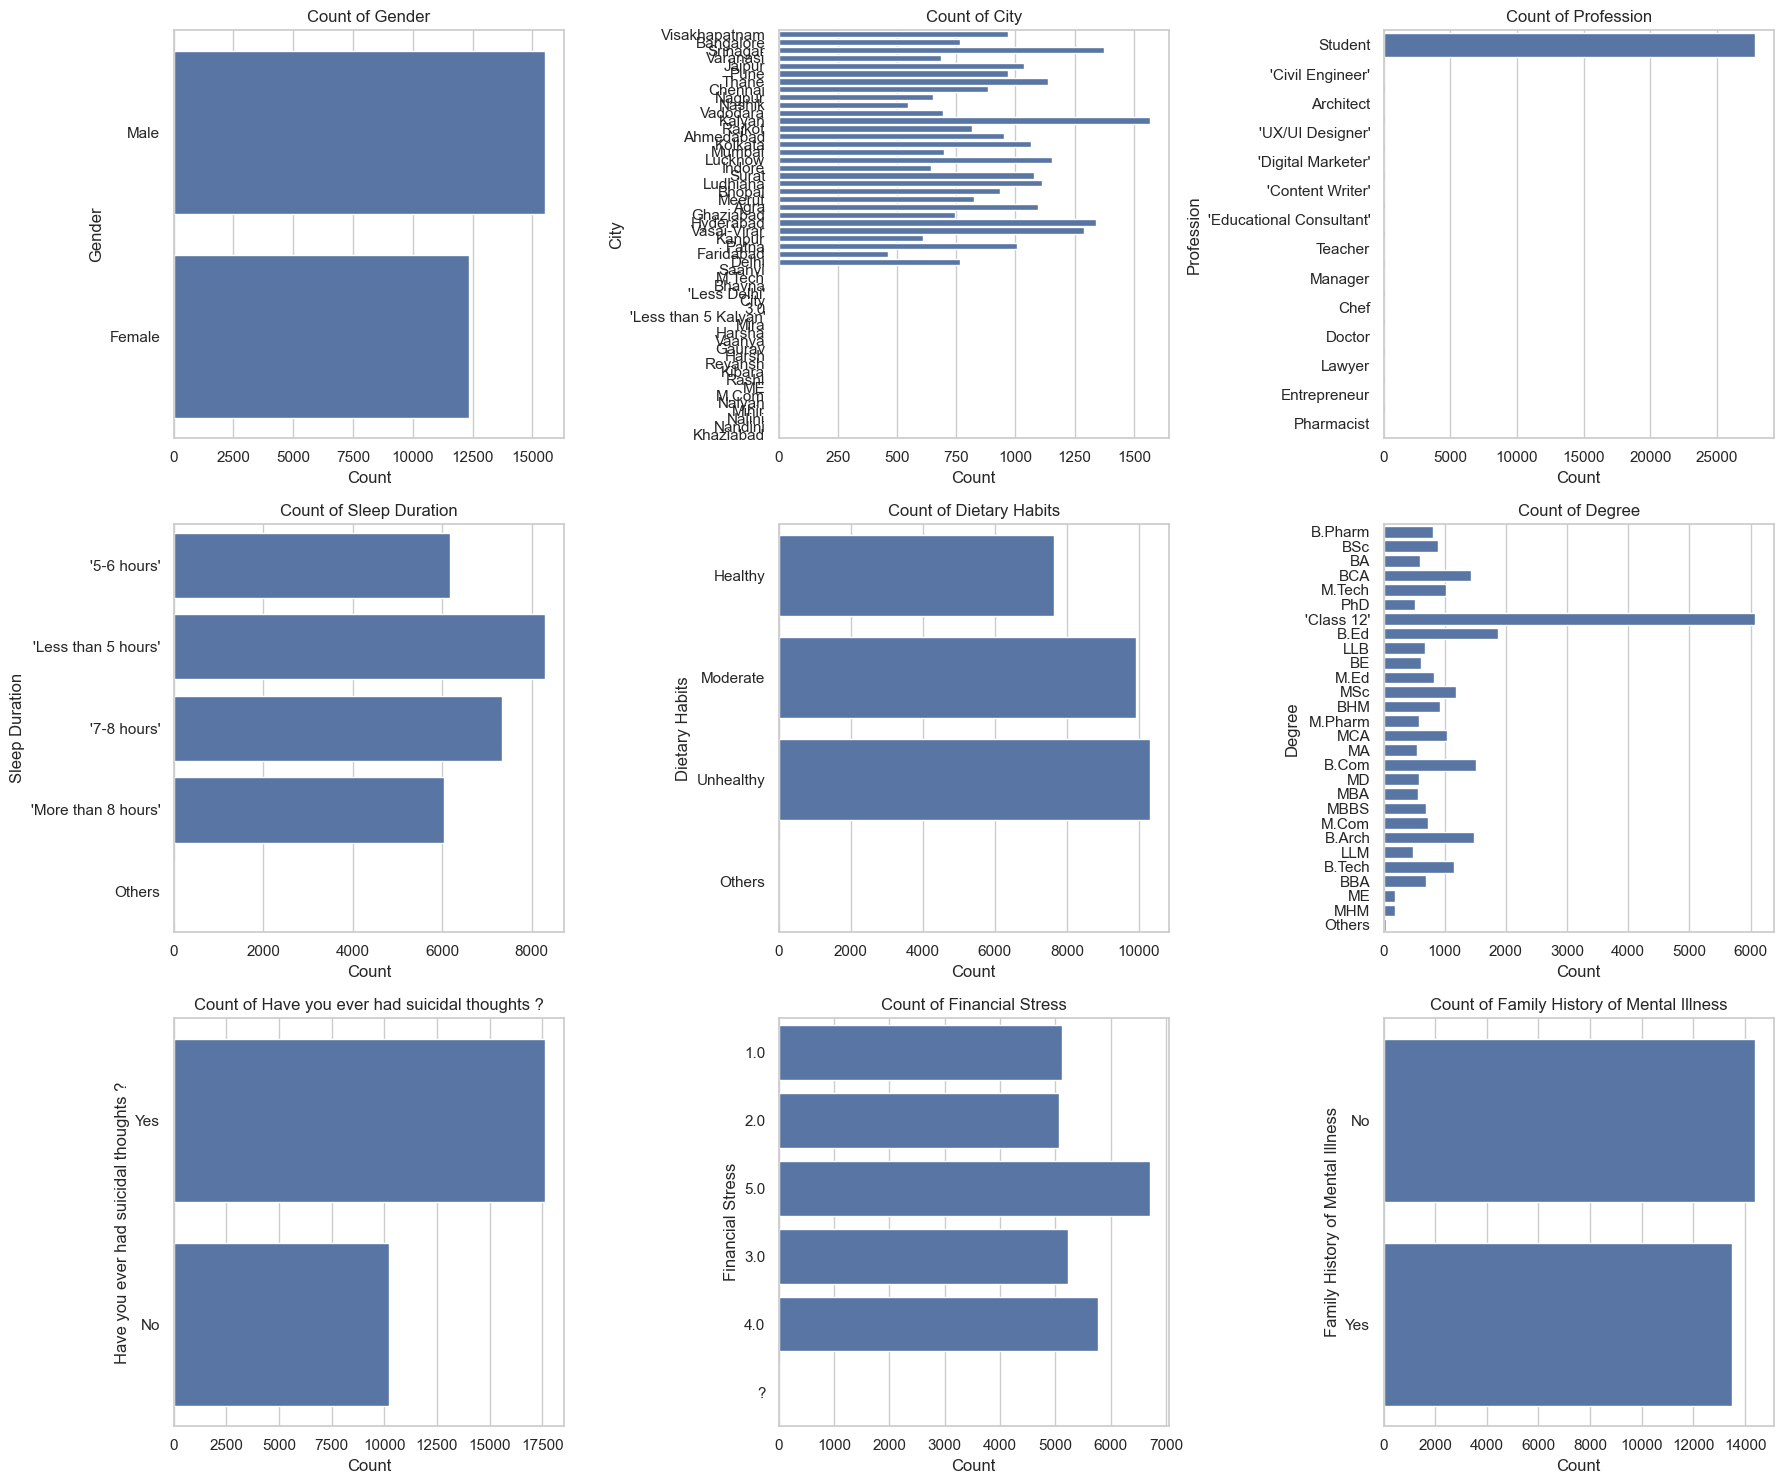

In [111]:
print("\n DISTRIBUTION PLOTS: CATEGORICAL")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("Count")

plt.tight_layout()
plt.show()

### SKEWNESS CHECK

Work Pressure         108.594361
Job Satisfaction       74.105663
Age                     0.132239
Study Satisfaction      0.010423
id                     -0.005380
CGPA                   -0.113063
Academic Pressure      -0.135165
Depression             -0.347126
Work/Study Hours       -0.454769
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_17048\3813697507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_vals.index, y=skew_vals.values, palette="magma")


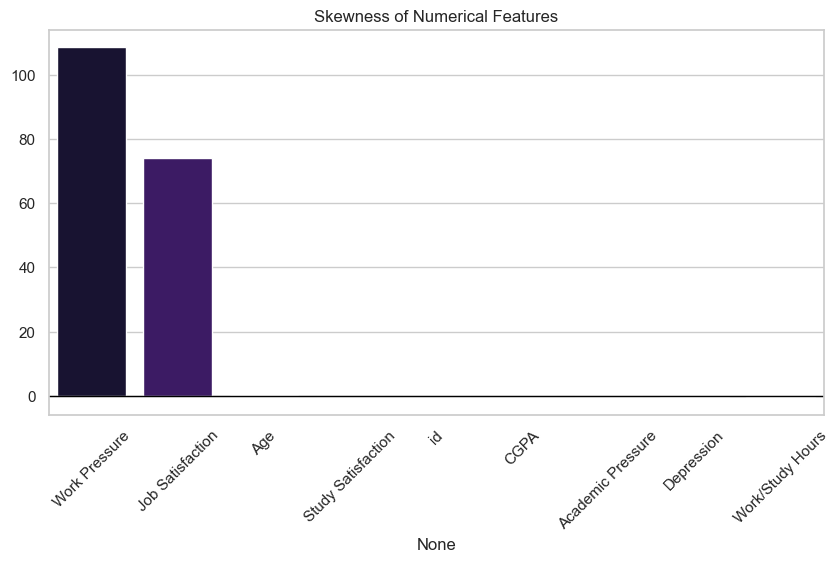

In [112]:
skew_vals = df[num_cols].skew().sort_values(ascending=False)
print(skew_vals)

plt.figure(figsize=(10,5))
sns.barplot(x=skew_vals.index, y=skew_vals.values, palette="magma")
plt.title("Skewness of Numerical Features")
plt.axhline(0, color="black", linewidth=1)
plt.xticks(rotation=45)
plt.show()

### OUTLIER DETECTION

In [113]:
zscore_outliers = {}
iqr_outliers = {}

for col in num_cols:
    skew = skew_vals[col]
    print(f"\n--- Column: {col} ---")
    print(f"Skewness: {skew:.3f}")

    # Normal → Z-score
    if abs(skew) < 0.5:
        print("Method: Z-score")
        z = np.abs(stats.zscore(df[col]))
        outlier_idx = df[z > 3].index
        zscore_outliers[col] = list(outlier_idx)
        print(f"Outliers detected: {len(outlier_idx)} rows")

    # Skewed → IQR
    else:
        print("Method: IQR")
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_idx = df[(df[col] < lower) | (df[col] > upper)].index
        iqr_outliers[col] = list(outlier_idx)
        print(f"Outliers detected: {len(outlier_idx)} rows")


--- Column: id ---
Skewness: -0.005
Method: Z-score
Outliers detected: 0 rows

--- Column: Age ---
Skewness: 0.132
Method: Z-score
Outliers detected: 19 rows

--- Column: Academic Pressure ---
Skewness: -0.135
Method: Z-score
Outliers detected: 0 rows

--- Column: Work Pressure ---
Skewness: 108.594
Method: IQR
Outliers detected: 3 rows

--- Column: CGPA ---
Skewness: -0.113
Method: Z-score
Outliers detected: 9 rows

--- Column: Study Satisfaction ---
Skewness: 0.010
Method: Z-score
Outliers detected: 0 rows

--- Column: Job Satisfaction ---
Skewness: 74.106
Method: IQR
Outliers detected: 8 rows

--- Column: Work/Study Hours ---
Skewness: -0.455
Method: Z-score
Outliers detected: 0 rows

--- Column: Depression ---
Skewness: -0.347
Method: Z-score
Outliers detected: 0 rows


### BOXPLOT NUMERICAL FEATURES

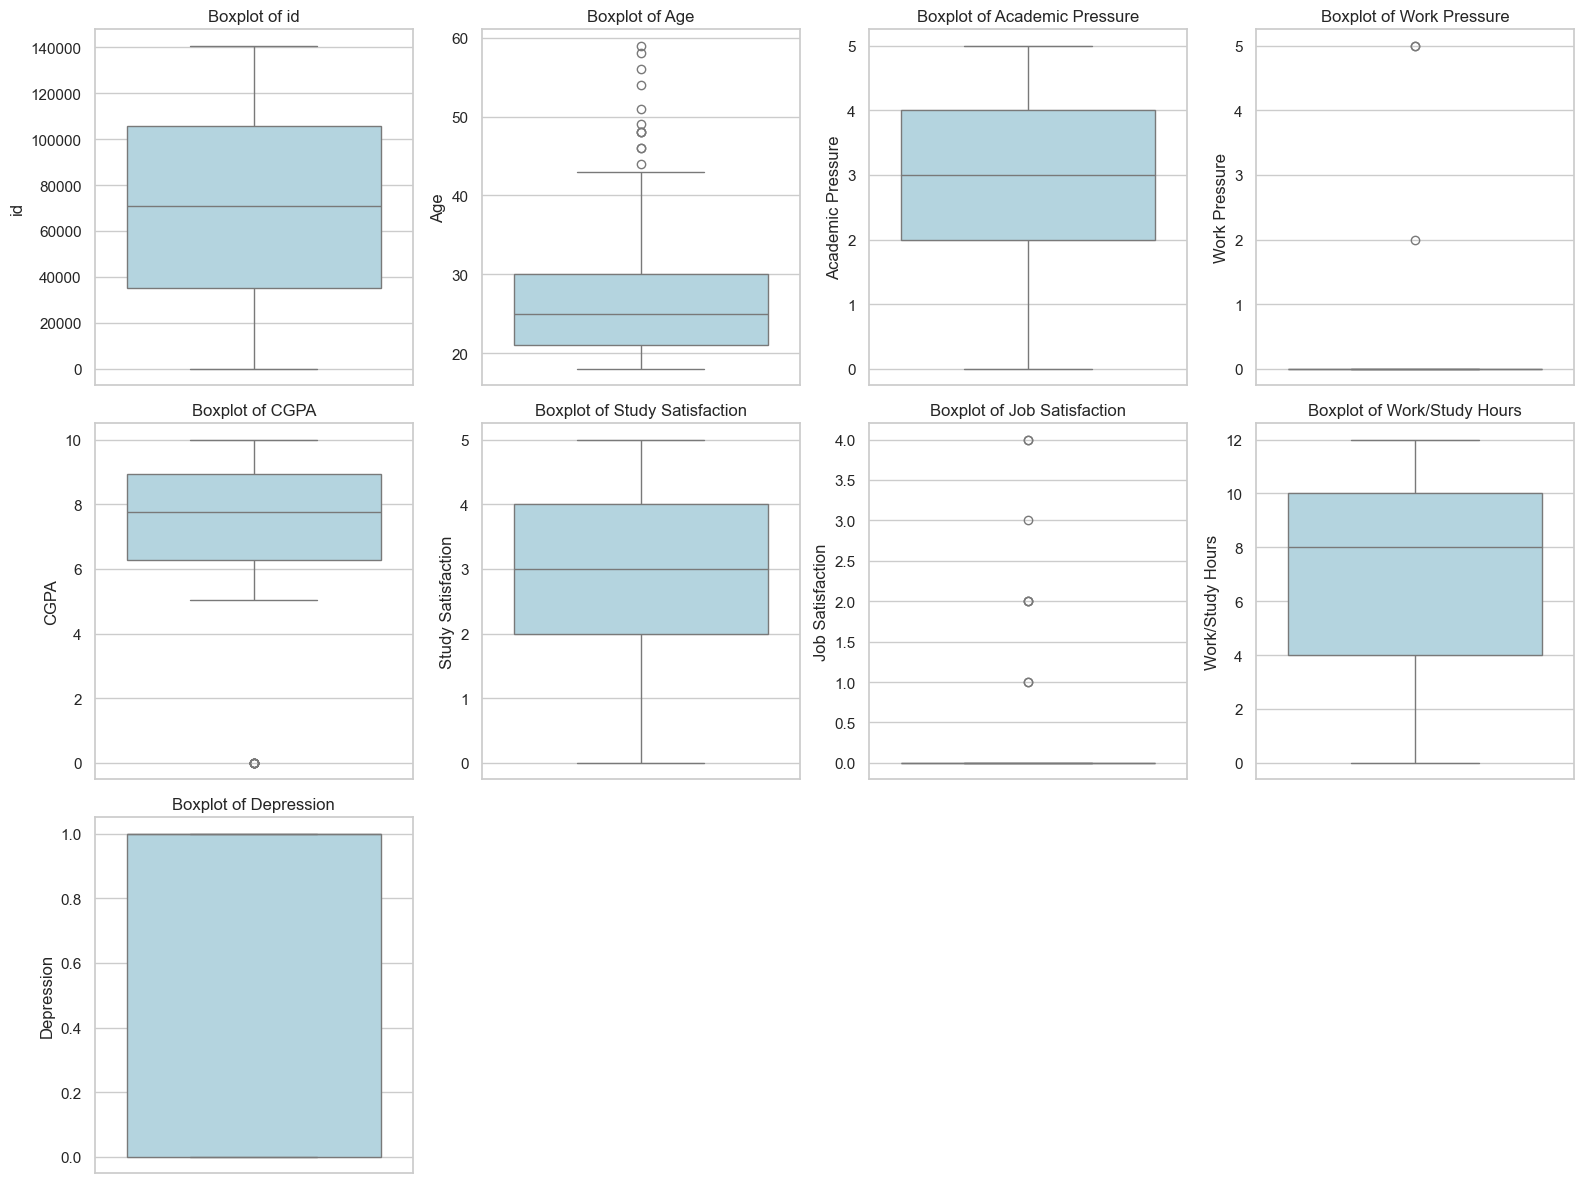

In [114]:
n_cols = len(num_cols)
n_rows = (n_cols + 3) // 4

plt.figure(figsize=(16, 4 * n_rows))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, 4, i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### CORELATION (NUMERIC)

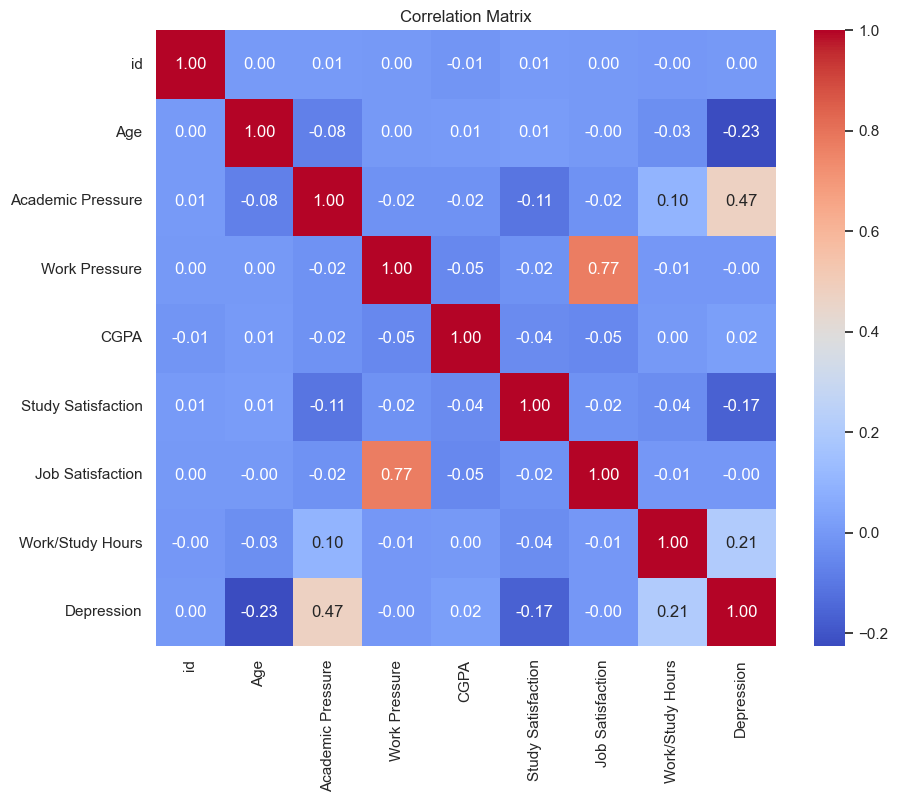

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### TARGET IMBALANCE CHECK


TARGET CLASS DISTRIBUTION
Depression
1    16336
0    11565
Name: count, dtype: int64

TARGET CLASS PERCENTAGE
Depression
1    58.55
0    41.45
Name: proportion, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_17048\1794166599.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette="coolwarm")


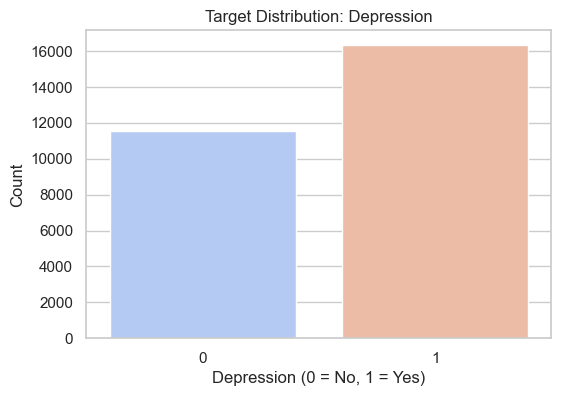

In [ ]:
target_col = "Depression"

print("\nTARGET CLASS DISTRIBUTION")
print(df[target_col].value_counts())

print("\nTARGET CLASS PERCENTAGE")
print((df[target_col].value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, palette="coolwarm")
plt.title("Target Distribution: Depression")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

### PAIRPLOT

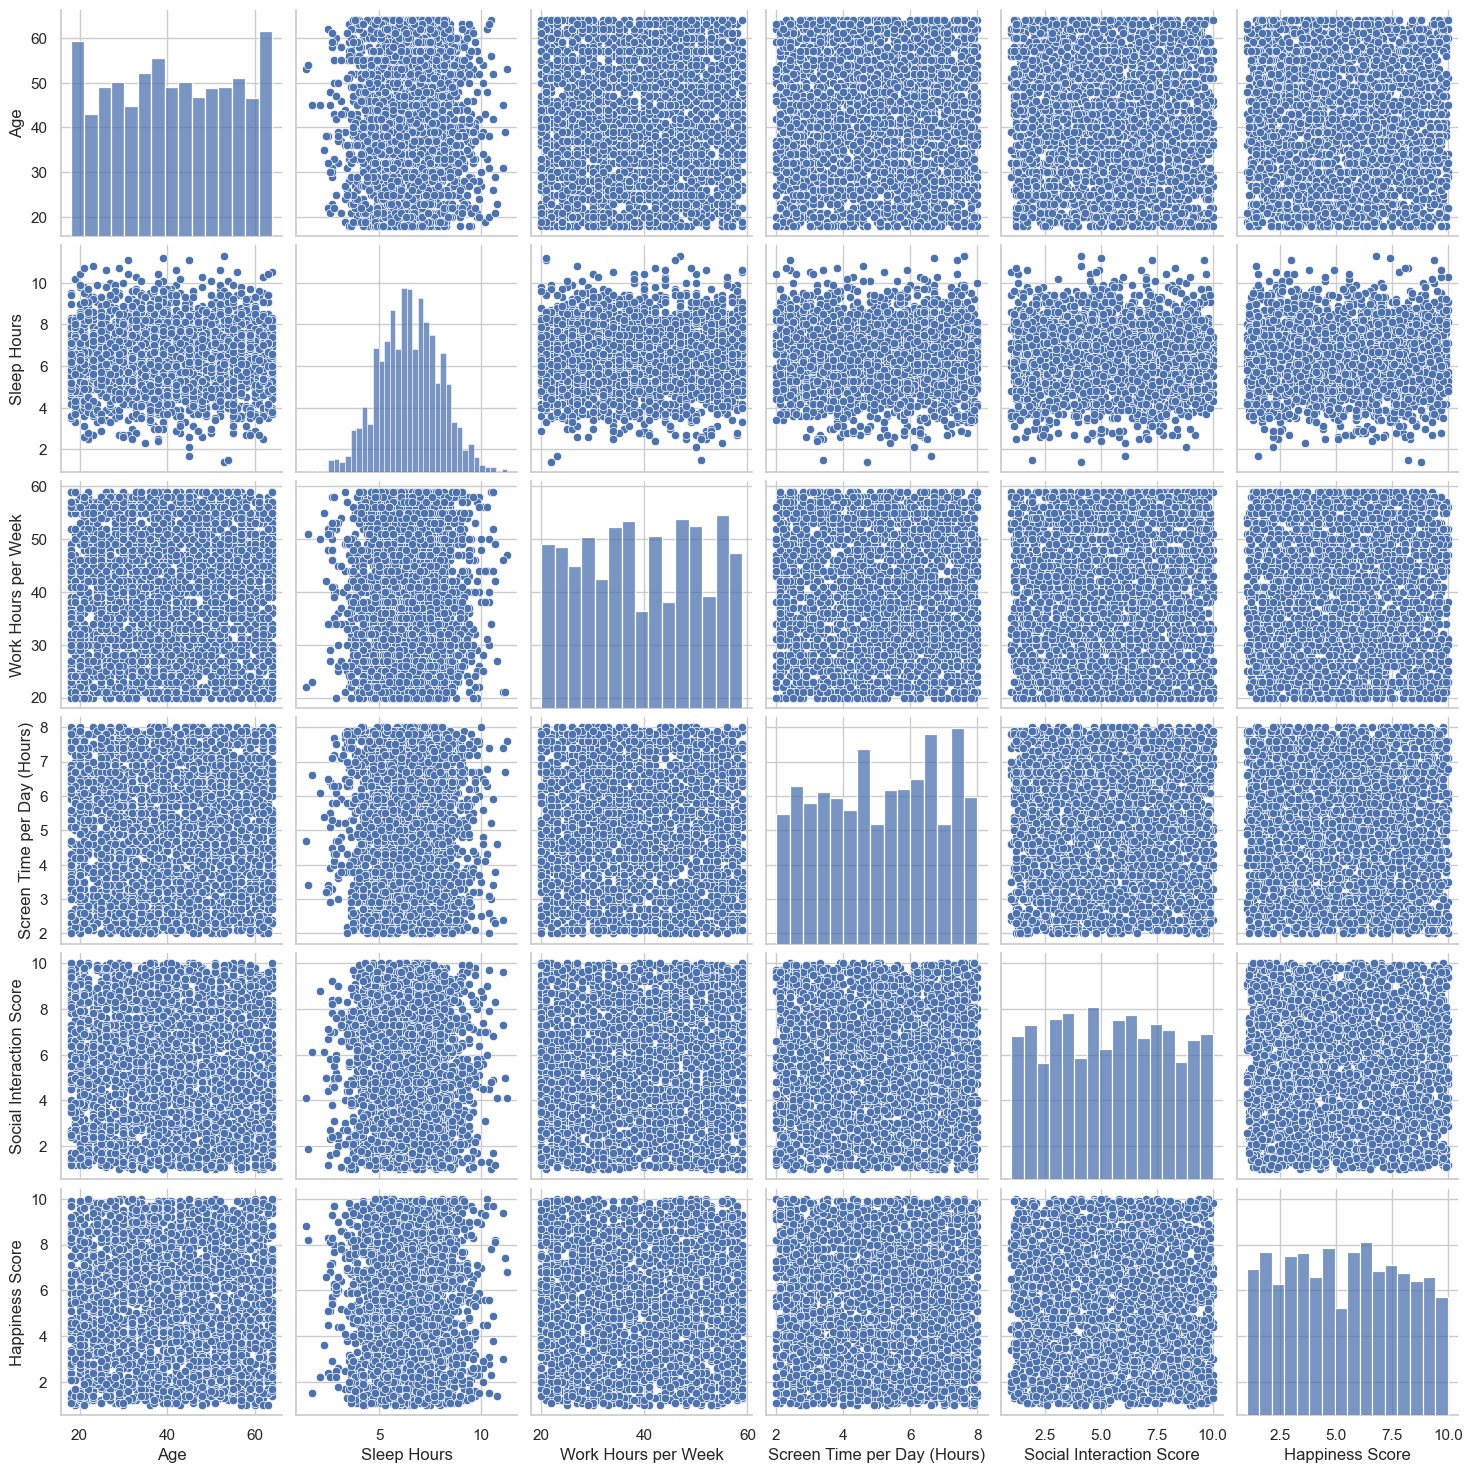

In [26]:
sns.pairplot(df[num_cols])
plt.show()

### NUMERIC vs TARGET RELATION (BOXPLOT)


NUMERICAL FEATURES VS TARGET



C:\Users\user\AppData\Local\Temp\ipykernel_17048\3946356985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set2")


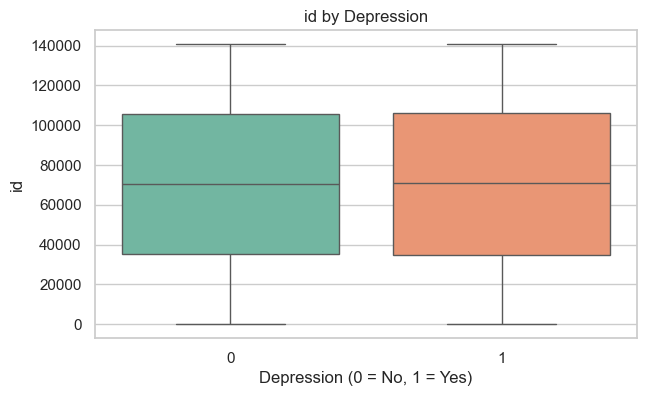

C:\Users\user\AppData\Local\Temp\ipykernel_17048\3946356985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set2")


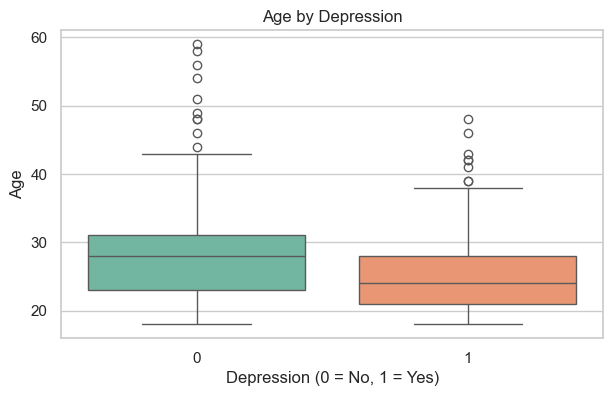

C:\Users\user\AppData\Local\Temp\ipykernel_17048\3946356985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set2")


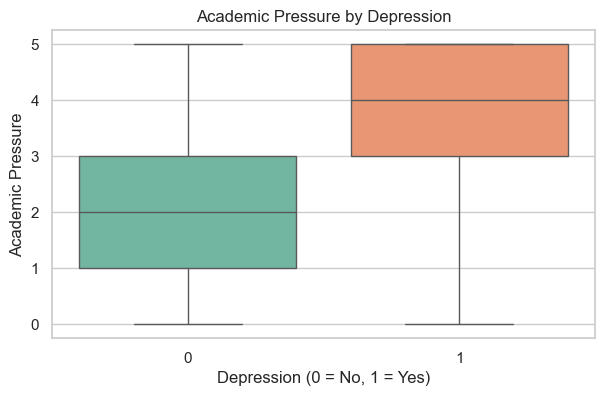

C:\Users\user\AppData\Local\Temp\ipykernel_17048\3946356985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set2")


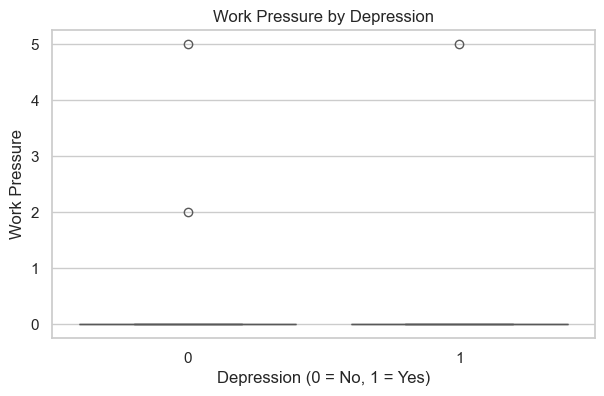

C:\Users\user\AppData\Local\Temp\ipykernel_17048\3946356985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set2")


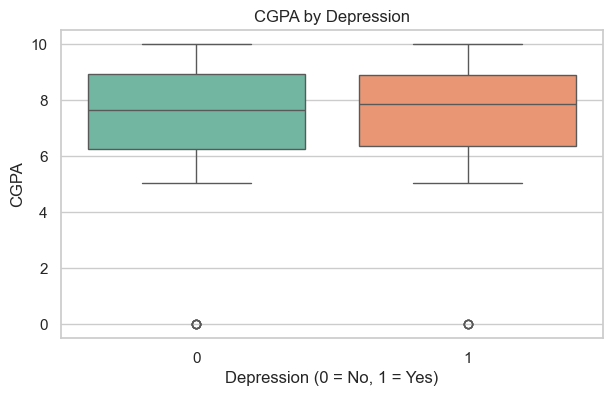

C:\Users\user\AppData\Local\Temp\ipykernel_17048\3946356985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set2")


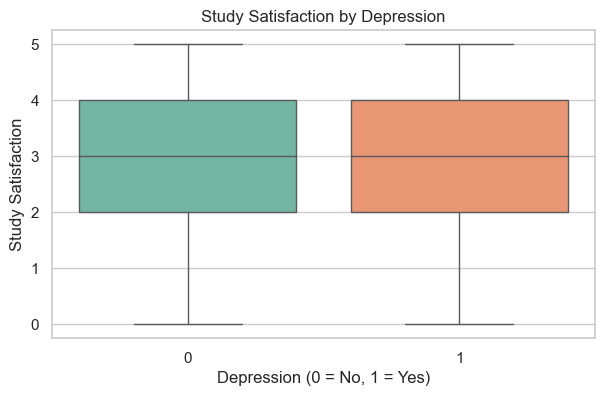

C:\Users\user\AppData\Local\Temp\ipykernel_17048\3946356985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set2")


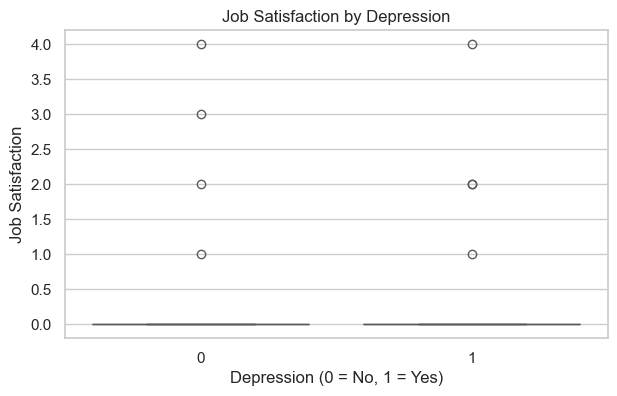

C:\Users\user\AppData\Local\Temp\ipykernel_17048\3946356985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set2")


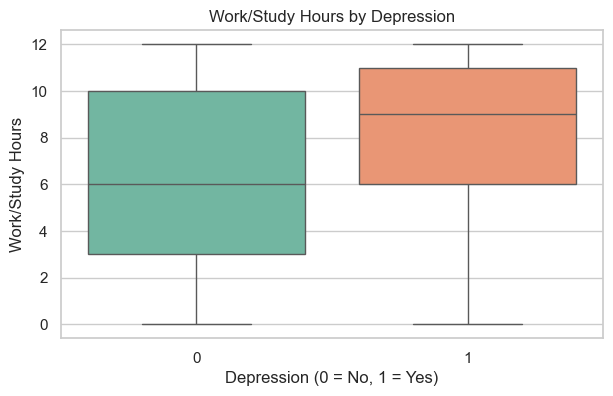

In [ ]:
print("\nNUMERICAL FEATURES VS TARGET\n")

for col in num_cols:
    if col != target_col:  
        plt.figure(figsize=(7,4))
        sns.boxplot(x=target_col, y=col, data=df, palette="Set2")
        plt.title(f"{col} by Depression")
        plt.xlabel("Depression (0 = No, 1 = Yes)")
        plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17048\3782364823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=target_col, y=col, data=df, jitter=0.2, palette="Set2")


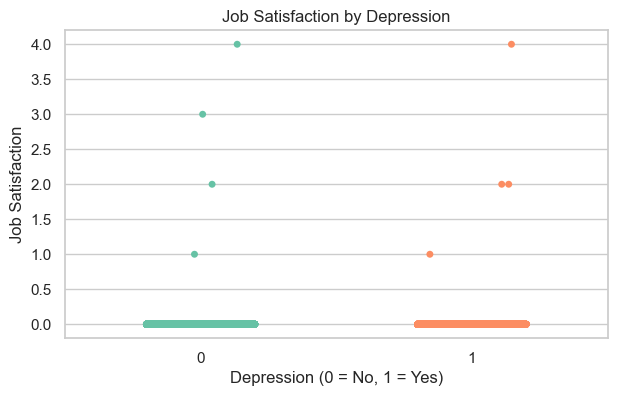

C:\Users\user\AppData\Local\Temp\ipykernel_17048\3782364823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=target_col, y=col, data=df, jitter=0.2, palette="Set2")


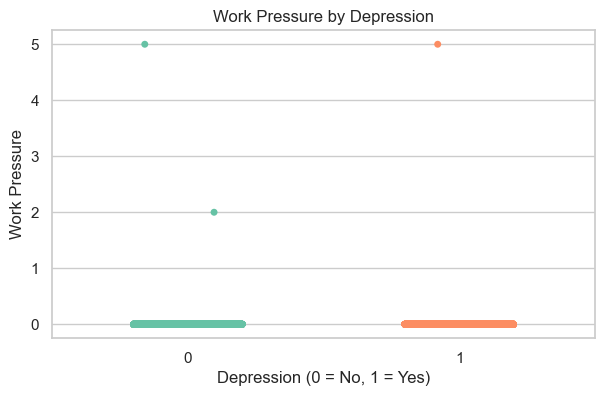

In [42]:
ordinal_cols = ["Job Satisfaction",  "Work Pressure"]

for col in ordinal_cols:
    plt.figure(figsize=(7,4))
    sns.stripplot(x=target_col, y=col, data=df, jitter=0.2, palette="Set2")
    plt.title(f"{col} by Depression")
    plt.xlabel("Depression (0 = No, 1 = Yes)")
    plt.show()


### CATEGORICAL vs TARGET RELATION


===== Gender vs Depression =====


Depression,0,1
Gender,,
Female,0.42,0.58
Male,0.41,0.59


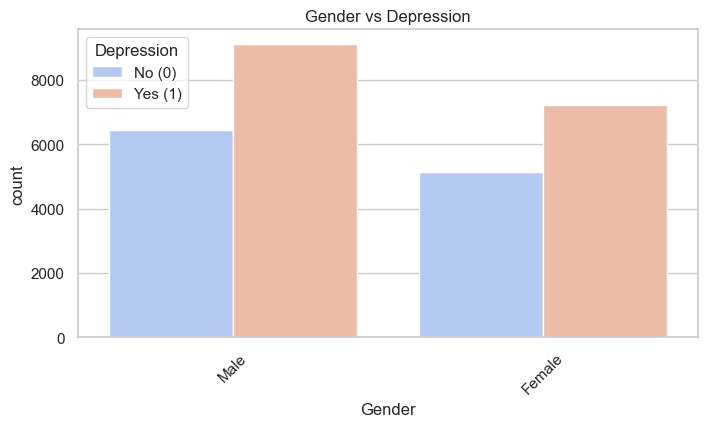


===== City vs Depression =====


Depression,0,1
City,,
'Less Delhi',1.00,0.00
'Less than 5 Kalyan',1.00,0.00
3.0,0.00,1.00
Agra,0.47,0.53
Ahmedabad,0.33,0.67
Bangalore,0.39,0.61
Bhavna,0.00,1.00
Bhopal,0.38,0.62
Chennai,0.40,0.60


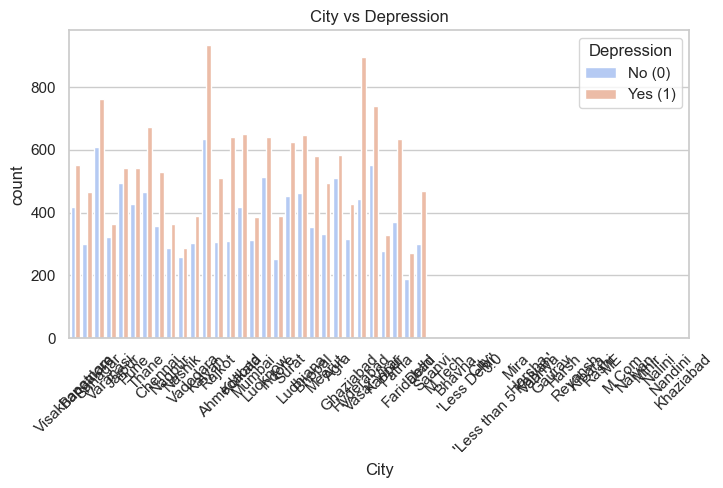


===== Profession vs Depression =====


Depression,0,1
Profession,,
'Civil Engineer',0.00,1.00
'Content Writer',0.00,1.00
'Digital Marketer',0.33,0.67
'Educational Consultant',0.00,1.00
'UX/UI Designer',0.00,1.00
Architect,0.12,0.88
Chef,0.00,1.00
Doctor,0.00,1.00
Entrepreneur,0.00,1.00


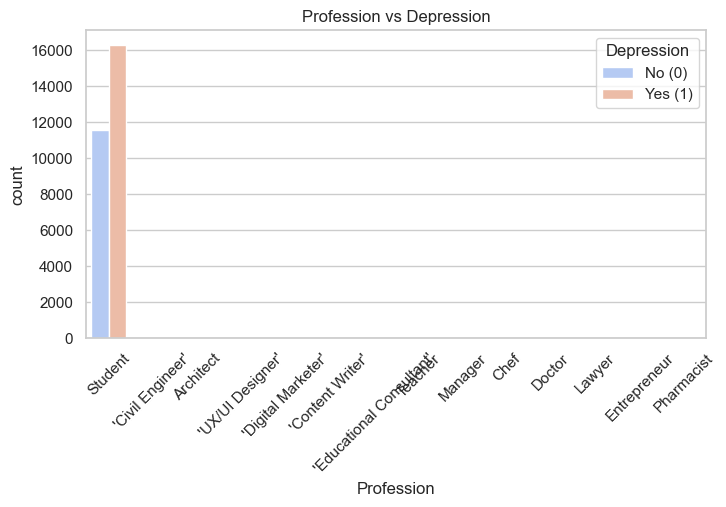


===== Sleep Duration vs Depression =====


Depression,0,1
Sleep Duration,,
'5-6 hours',0.43,0.57
'7-8 hours',0.40,0.60
'Less than 5 hours',0.35,0.65
'More than 8 hours',0.49,0.51
Others,0.50,0.50


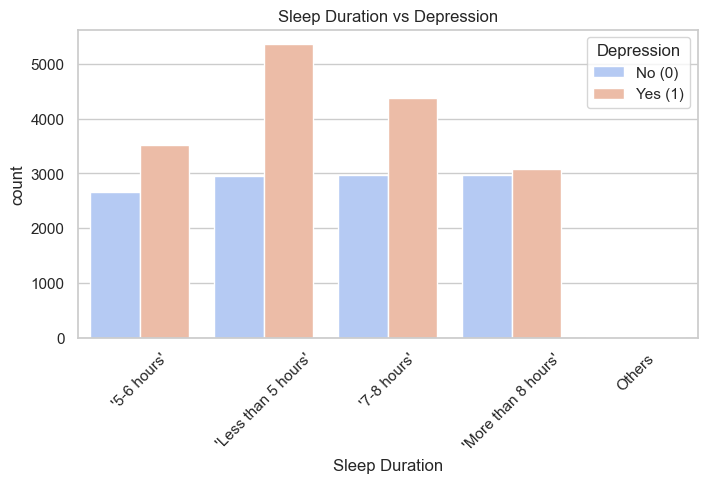


===== Dietary Habits vs Depression =====


Depression,0,1
Dietary Habits,,
Healthy,0.55,0.45
Moderate,0.44,0.56
Others,0.33,0.67
Unhealthy,0.29,0.71


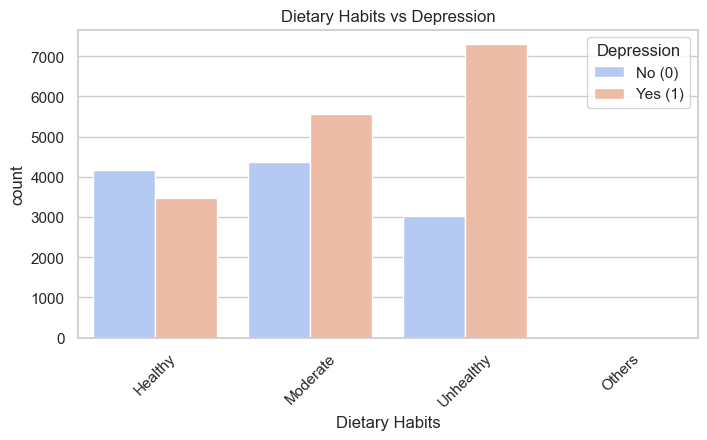


===== Degree vs Depression =====


Depression,0,1
Degree,,
'Class 12',0.29,0.71
B.Arch,0.41,0.59
B.Com,0.43,0.57
B.Ed,0.45,0.55
B.Pharm,0.47,0.53
B.Tech,0.43,0.57
BA,0.46,0.54
BBA,0.42,0.58
BCA,0.43,0.57


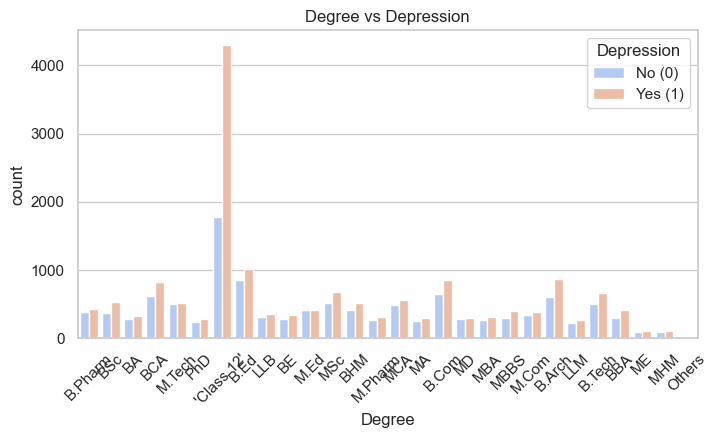


===== Have you ever had suicidal thoughts ? vs Depression =====


Depression,0,1
Have you ever had suicidal thoughts ?,,
No,0.77,0.23
Yes,0.21,0.79


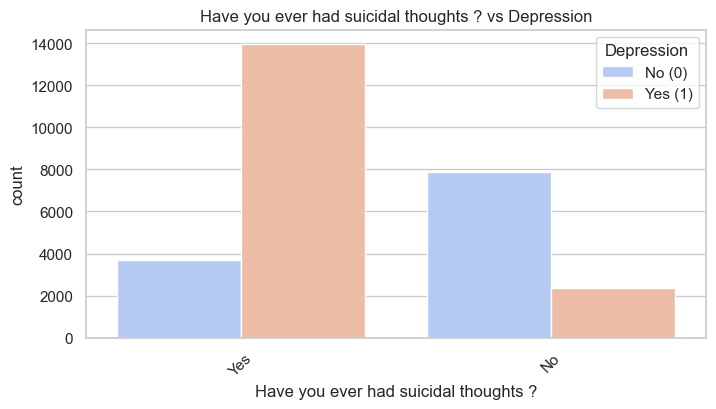


===== Financial Stress vs Depression =====


Depression,0,1
Financial Stress,,
1.0,0.68,0.32
2.0,0.57,0.43
3.0,0.41,0.59
4.0,0.31,0.69
5.0,0.19,0.81
?,0.67,0.33


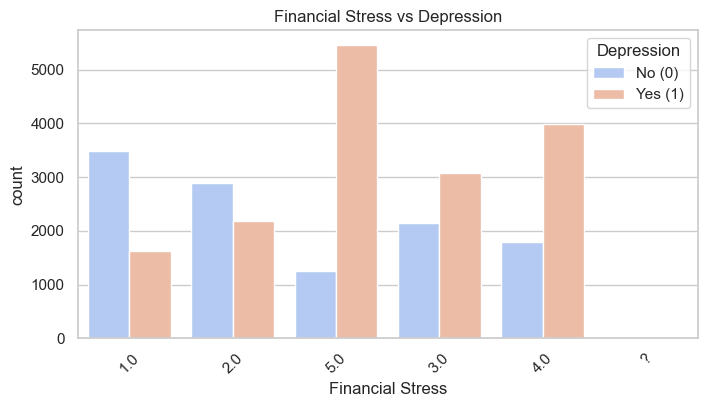


===== Family History of Mental Illness vs Depression =====


Depression,0,1
Family History of Mental Illness,,
No,0.44,0.56
Yes,0.39,0.61


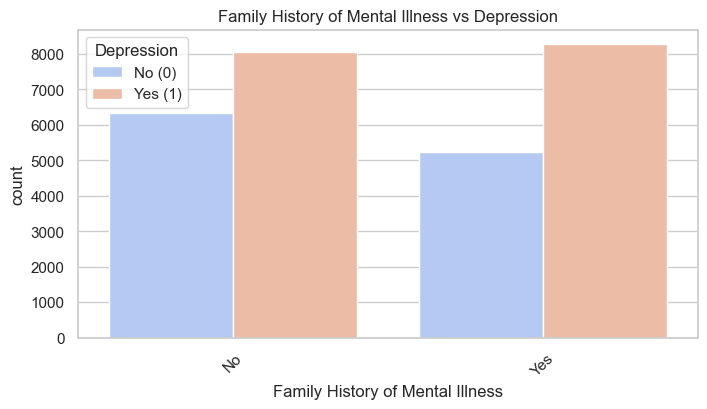

In [39]:
for col in cat_cols:
     if col != target_col:
        print(f"\n===== {col} vs Depression =====")
        display(pd.crosstab(df[col], df[target_col], normalize="index").round(2))

        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue=target_col, data=df, palette="coolwarm")
        plt.title(f"{col} vs Depression")
        plt.xticks(rotation=45)
        plt.legend(title="Depression", labels=["No (0)", "Yes (1)"])
        plt.show()


## DATA PREPARATION

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### COLUMN REMOVAL

In [116]:
df_prep = df.copy()

if 'id' in df_prep.columns:
    df_prep = df_prep.drop(columns=['id'])


drop_cols = ['Work Pressure', 'Job Satisfaction']
df_prep = df_prep.drop(columns=drop_cols)


### CATEGORIZING FEATURES

In [167]:
continuous_cols = ['Age', 'CGPA', 'Work/Study Hours']

ordinal_cols = ['Academic Pressure',
                'Study Satisfaction']

categorical_cols = ['Gender',
                    'City',
                    'Profession',
                    'Sleep Duration',
                    'Dietary Habits',
                    'Degree',
                    'Social Weakness',
                    'Have you ever had suicidal thoughts ?',
                    'Financial Stress',
                    'Family History of Mental Illness']

print("Continuous cols :", continuous_cols)
print("Ordinal cols    :", ordinal_cols)
print("Categorical cols:", categorical_cols)

Continuous cols : ['Age', 'CGPA', 'Work/Study Hours']
Ordinal cols    : ['Academic Pressure', 'Study Satisfaction']
Categorical cols: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Social Weakness', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


### HANDLING MISSING & DUPLICATE VALUES

In [120]:
print(df_prep.isnull().sum())
df_prep = df_prep.dropna()

df_prep = df_prep.drop_duplicates()
print("Duplicate rows after removal:", df_prep.duplicated().sum())


Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
Duplicate rows after removal: 0


### ENCODING

In [168]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

df_encoded = df_prep.copy()

In [ ]:
###CLEANING
df_encoded['Sleep Duration'] = (
    df_encoded['Sleep Duration']
    .astype(str)
    .str.replace("'", "")
    .str.strip()
)

In [ ]:
#BINARY ENCODING
ordinal_mapping = {
    "Sleep Duration": {
        "Less than 5 hours": 1,
        "5-6 hours": 2,
        "7-8 hours": 3,
        "More than 8 hours": 4,
        "Others": 0
    },
    "Financial Stress": {
        "1.0": 1, "2.0": 2, "3.0": 3, "4.0": 4, "5.0": 5, "?": 0
    },
    "Have you ever had suicidal thoughts ?": {"No": 0, "Yes": 1},
    "Family History of Mental Illness": {"No": 0, "Yes": 1}
}

for col, mapping in ordinal_mapping.items():
    df_encoded[col] = df_encoded[col].map(mapping).fillna(0).astype(float)


#LABEL ENCODING
label_cols = ['Gender', 'Dietary Habits', 'Degree']

print("\nApplying Label Encoding to:", label_cols)

le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = le.fit_transform(df_encoded[col])


#TARGET ENCODING
target_enc_cols = ['City', 'Profession']
target_col = "Depression"

print("\nApplying Target Encoding to:", target_enc_cols)

te = TargetEncoder()
df_encoded[target_enc_cols] = te.fit_transform(df_encoded[target_enc_cols], df_encoded[target_col])


print("\nEncoding Complete")
print("\nData Types After Encoding:\n")
print(df_encoded.dtypes)

print("\nSample Preview:\n")
df_encoded.head()



🔧 Applying Label Encoding to: ['Gender', 'Dietary Habits', 'Degree']

🎯 Applying Target Encoding to: ['City', 'Profession']

📌 Encoding Complete

Data Types After Encoding:

Gender                                     int64
Age                                      float64
City                                     float64
Profession                               float64
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                           float64
Dietary Habits                             int64
Degree                                     int64
Have you ever had suicidal thoughts ?    float64
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness         float64
Depression                                 int64
dtype: object

🔍 Sample Preview:



,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,0.569659,0.585145,5.0,8.97,2.0,2.0,0,4,1.0,3.0,1.0,0.0,1
1,0,24.0,0.608866,0.585145,2.0,5.90,5.0,2.0,1,11,0.0,3.0,2.0,1.0,0
2,1,31.0,0.556122,0.585145,3.0,7.03,5.0,1.0,0,6,0.0,9.0,1.0,1.0,0
3,0,28.0,0.531387,0.585145,3.0,5.59,2.0,3.0,1,8,1.0,4.0,5.0,1.0,1
4,0,25.0,0.524131,0.585145,4.0,8.13,3.0,2.0,1,17,1.0,1.0,1.0,0.0,0


### HANDLING OUTLIERS

In [ ]:
outlier_cols = ['Age', 'CGPA']

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

for col in outlier_cols:
    print(f"Applying : {col}")
    df_encoded = cap_outliers(df_encoded, col)


Applying : Age
Applying : CGPA


In [124]:
print("\nRechecking outliers after capping:")

for col in outlier_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df_encoded[(df_encoded[col] < lower) | (df_encoded[col] > upper)]
    print(f"{col} -> Remaining Outliers: {len(outliers)}")



Rechecking outliers after capping:
Age -> Remaining Outliers: 0
CGPA -> Remaining Outliers: 0


Total Numeric Columns: 15


<Figure size 2500x1200 with 0 Axes>

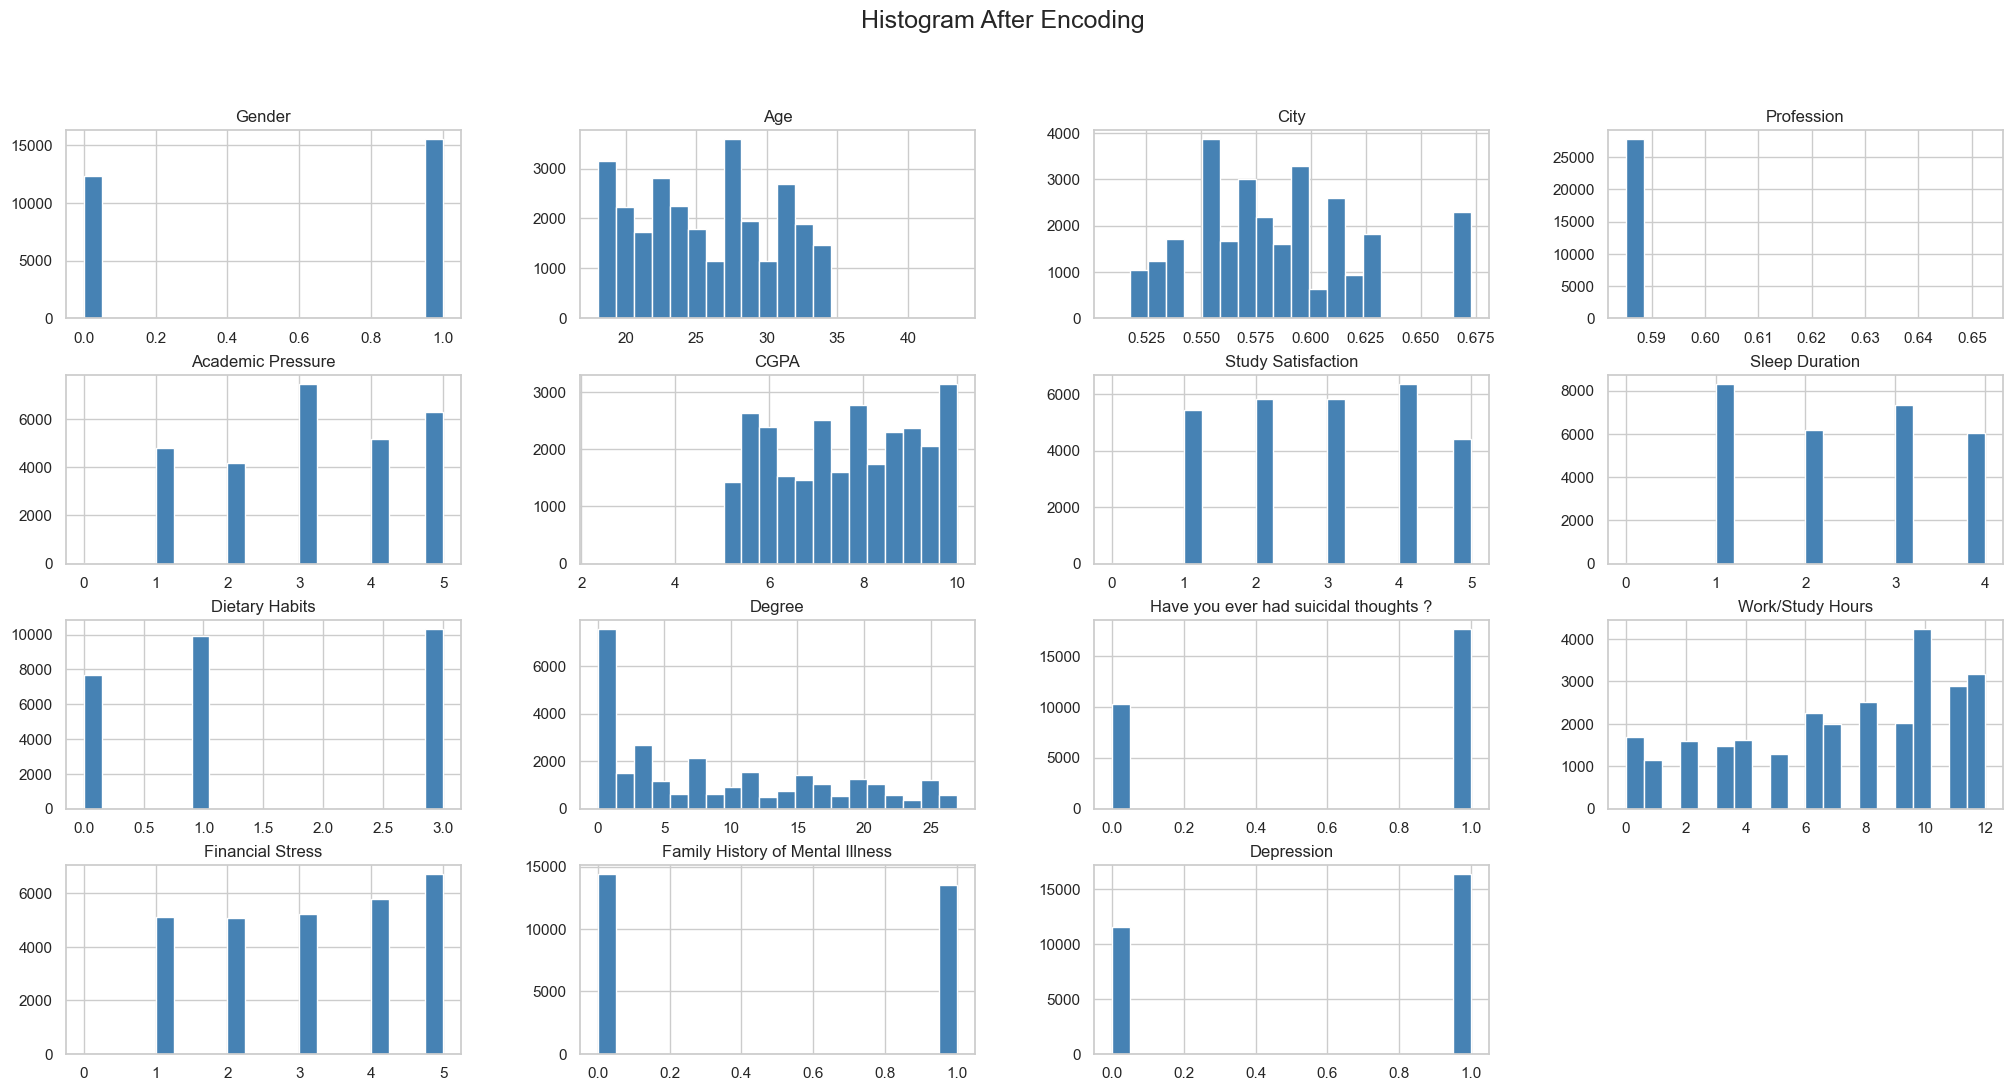

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

print(f"Total Numeric Columns: {len(num_cols)}")

plt.figure(figsize=(25, 12))
df_encoded[num_cols].hist(bins=20, figsize=(25, 12), color='steelblue')
plt.suptitle("Histogram After Encoding", fontsize=18)
plt.show()



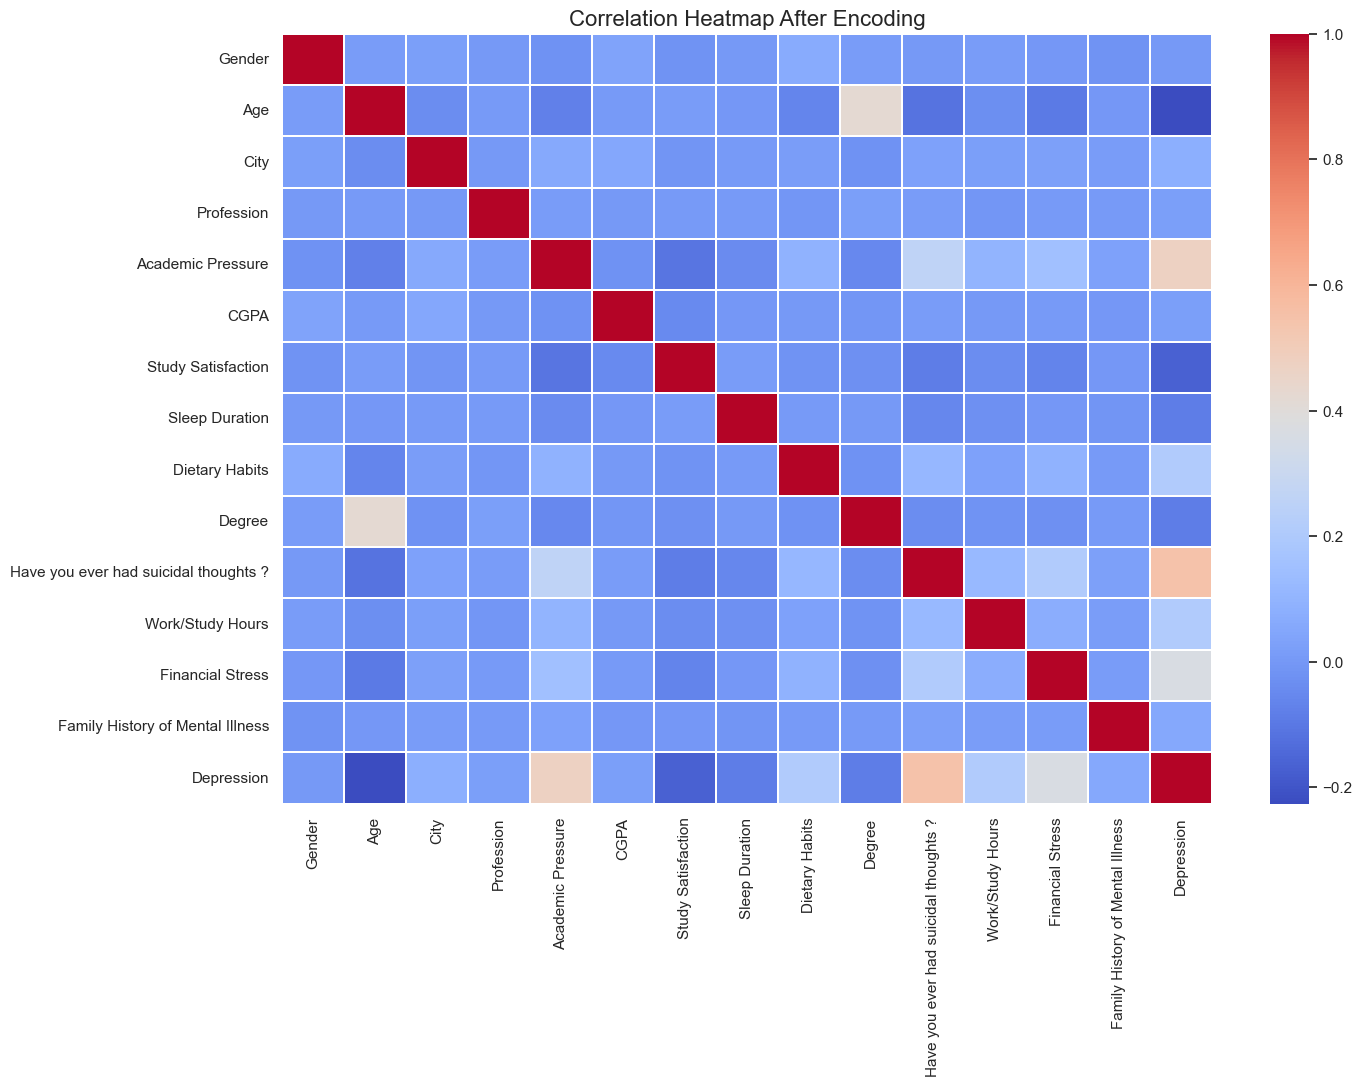

In [ ]:
corr = df_encoded.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.3)
plt.title("Correlation Heatmap After Encoding", fontsize=16)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17048\1347342671.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")


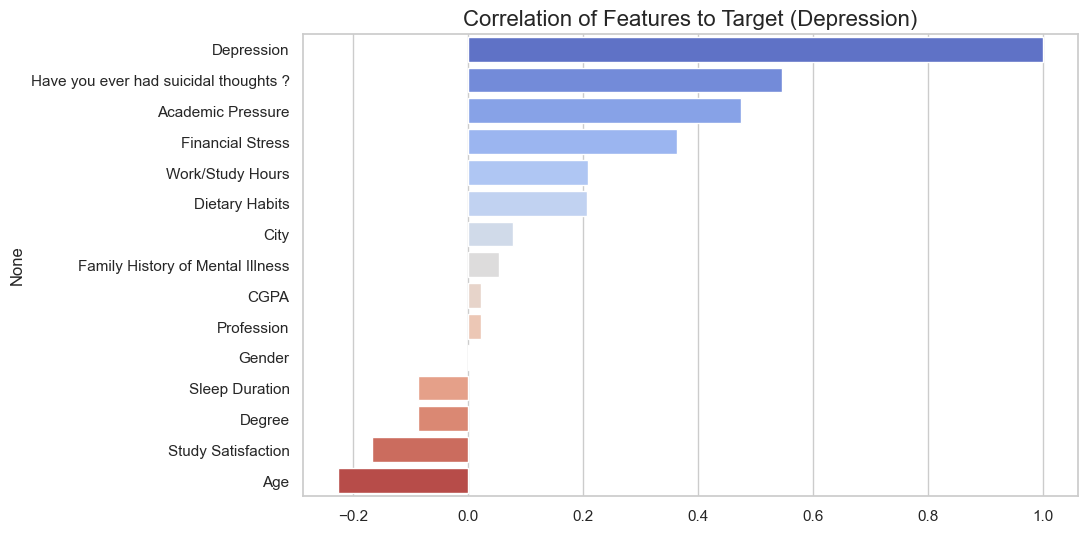

In [ ]:
target = "Depression"

corr_target = corr[target].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")
plt.title(f"Correlation of Features to Target ({target})", fontsize=16)
plt.show()


In [132]:
from sklearn.preprocessing import StandardScaler

# Copy dataset for scaling
df_scaled = df_encoded.copy()

# Identify features except target
feature_cols = df_scaled.columns[df_scaled.columns != 'Depression']

# Apply StandardScaler
scaler = StandardScaler()
df_scaled[feature_cols] = scaler.fit_transform(df_scaled[feature_cols])

df_scaled.head()


,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.891416,1.468036,-0.416681,-0.032154,1.345543,0.894910,-0.693425,-0.352325,-1.182363,-0.594731,0.761745,-1.121213,-1.488252,-0.968421,1
1,-1.121811,-0.371929,0.614222,-0.032154,-0.826104,-1.197308,1.510636,-0.352325,-0.375705,0.246705,-1.312775,-1.121213,-0.792654,1.032609,0
2,0.891416,1.059155,-0.772627,-0.032154,-0.102222,-0.427208,1.510636,-1.238890,-1.182363,-0.354321,-1.312775,0.497095,-1.488252,1.032609,0
3,-1.121811,0.445833,-1.423032,-0.032154,-0.102222,-1.408574,-0.693425,0.534240,-0.375705,-0.113911,0.761745,-0.851495,1.294140,1.032609,1
4,-1.121811,-0.167489,-1.613813,-0.032154,0.621660,0.322447,0.041262,-0.352325,-0.375705,0.967935,0.761745,-1.660650,-1.488252,-0.968421,0


In [133]:
from sklearn.model_selection import train_test_split

# Pisahkan X dan y
X = df_scaled.drop(columns=['Depression'])
y = df_scaled['Depression']

# Train-test split dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nDistribusi Target di Training Set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nDistribusi Target di Test Set:")
print(y_test.value_counts(normalize=True) * 100)


Train shape: (22320, 14)
Test shape: (5581, 14)

Distribusi Target di Training Set:
Depression
1    58.548387
0    41.451613
Name: proportion, dtype: float64

Distribusi Target di Test Set:
Depression
1    58.555814
0    41.444186
Name: proportion, dtype: float64


In [ ]:
#KNN

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [135]:
# Baseline KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediction
y_pred_knn = knn.predict(X_test)


In [136]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("KNN Baseline Model Performance:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm


KNN Baseline Model Performance:
Accuracy  : 0.8169
Precision : 0.8280
Recall    : 0.8675
F1-Score  : 0.8473

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      2313
           1       0.83      0.87      0.85      3268

    accuracy                           0.82      5581
   macro avg       0.81      0.81      0.81      5581
weighted avg       0.82      0.82      0.82      5581



array([[1724,  589],
       [ 433, 2835]])

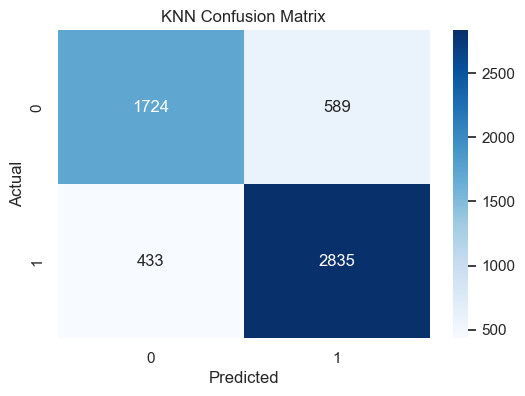

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Desicion Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [140]:
# Baseline Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print("Decision Tree Baseline Performance:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))


Decision Tree Baseline Performance:
Accuracy  : 0.7610
Precision : 0.7972
Recall    : 0.7938
F1-Score  : 0.7955

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2313
           1       0.80      0.79      0.80      3268

    accuracy                           0.76      5581
   macro avg       0.75      0.75      0.75      5581
weighted avg       0.76      0.76      0.76      5581



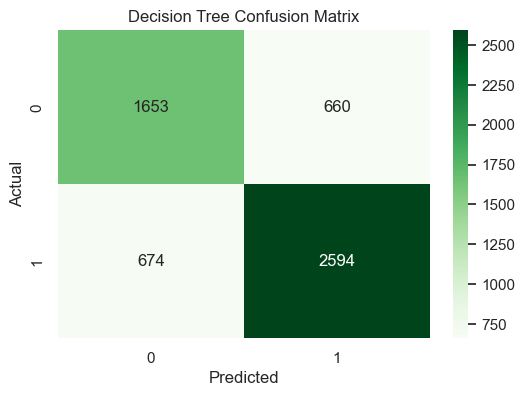

In [142]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


In [166]:
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("SVM Baseline Model Performance:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Baseline Model Performance:
Accuracy  : 0.8404
Precision : 0.8493
Recall    : 0.8843
F1-score  : 0.8664

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2313
           1       0.85      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



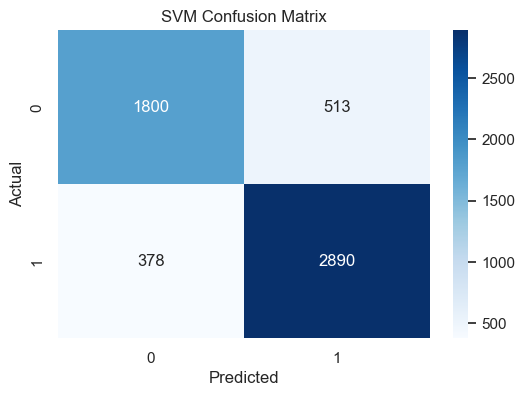

In [147]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [149]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


📌 Random Forest Model Performance:
Accuracy  : 0.8373
Precision : 0.8493
Recall    : 0.8779
F1-score  : 0.8634

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



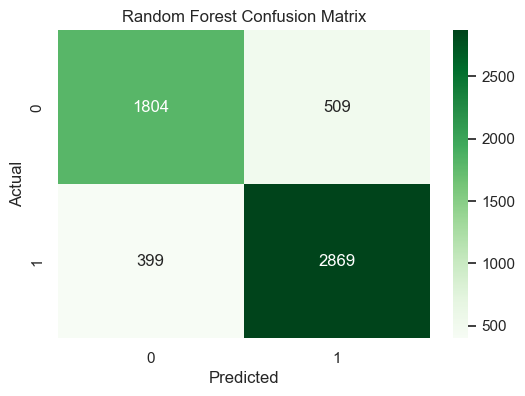

In [151]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, cmap="Greens", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [152]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances.head(20)


,Feature,Importance
10,Have you ever had suicidal thoughts ?,0.217841
4,Academic Pressure,0.162273
12,Financial Stress,0.096663
5,CGPA,0.086170
1,Age,0.083183
2,City,0.072767
11,Work/Study Hours,0.071725
9,Degree,0.063649
6,Study Satisfaction,0.043699
8,Dietary Habits,0.035675


In [156]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# ========== Train Gradient Boosting ==========
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train_fs, y_train_fs)
y_pred_gb = gb_model.predict(X_test_fs)

In [164]:
accuracy_gb = accuracy_score(y_test_fs, y_pred_gb)
report_gb = classification_report(y_test_fs, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test_fs, y_pred_gb)
roc_gb = roc_auc_score(y_test_fs, gb_model.predict_proba(X_test_fs)[:,1])

print("\nGradient Boosting Model Results:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"ROC-AUC Score: {roc_gb:.4f}")
print("\nClassification Report:")
print(report_gb)


Gradient Boosting Model Results:
Accuracy: 0.8404
ROC-AUC Score: 0.9153

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



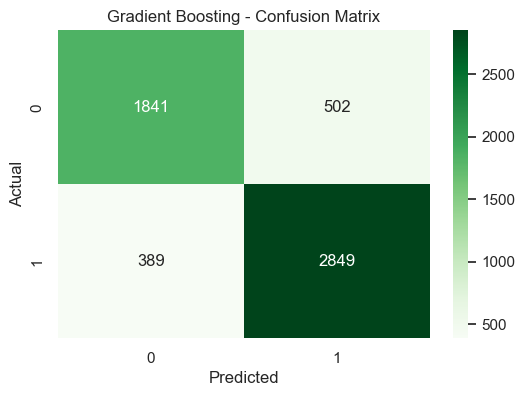

In [158]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Greens")
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()